## 다항 회귀 모델 구현
* 다항 회귀는 Y를 X에 대한 임의의 다항 함수로 모델링하는 선형 회귀를 의미한다.
* 먼저 입력 데이터 X에 대한 전처리를 진행해준 후 다중 선형 회귀를 적용함으로써 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈
from sklearn.preprocessing import PolynomialFeatures

### 데이터 생성

In [2]:
def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)
    
    return X, y

### PolynomialFeatures(degree, include_bias) 
Polynomial 객체를 생성<br>
PolynomialFeature 객체를 활용하여 각 변수 값을 제곱하고, 데이터에 추가하는 함수를 구현

* degree: 만들어줄 다항식의 차수
* include_bias : 편향 변수의 추가 여부를 설정 (True/False)
    * True로 설정하게 되면, 해당 다항식의 모든 거듭제곱이 0일 경우 편향 변수를 추가 
    * 이는 회귀식에서 β0와 같은 역할

### [PolynomialFeatures].fit_transform(X): 
* 데이터 X와 X의 degree제곱을 추가한 데이터를 반환
* fit(X)와 transform(X) 을 각각 분리해서 진행 가능

In [3]:
def Polynomial_transform(X):
    
    poly_feat = PolynomialFeatures(degree=2,include_bias= True)
    
    poly_X = poly_feat.fit_transform(X)
    
    print("변환 이후 X 데이터\n",poly_X[:3])
    
    return poly_X

### 모델 학습

In [4]:
def Multi_Regression(poly_X, y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(poly_X, y)
    
    return multilinear

### 그래프 시각화

In [5]:
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test_poly.png")

### 결과
학습이 완료된 모델을 활용하여 테스트 데이터에 대한 예측을 수행

변환 이후 X 데이터
 [[1.         2.64644051 7.00364738]
 [1.         3.1455681  9.89459867]
 [1.         2.80829013 7.88649344]]


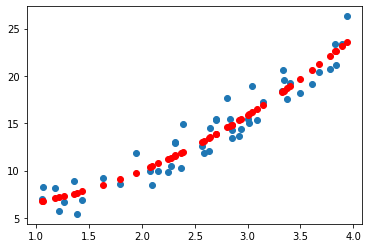

In [6]:
def main():
    X,y  = load_data()
    
    poly_X = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_X,y)
    
    predicted = linear_model.predict(poly_X)
    
    plotting_graph(X,y,predicted)
    
    return predicted
    
if __name__=="__main__":
    main()

---

### 코드 정리

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 다항 회귀의 입력값을 변환하기 위한 모듈 
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)
    
    return X, y
    
"""
1. PolynomialFeature 객체 
"""
def Polynomial_transform(X):
    
    poly_feat = PolynomialFeatures(degree=2,include_bias= True)
    
    poly_X = poly_feat.fit_transform(X)
    
    print("변환 이후 X 데이터\n",poly_X[:3])
    
    return poly_X
    
"""
2. 다중 선형회귀 모델 
"""
def Multi_Regression(poly_X, y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(poly_X, y)
    
    return multilinear
    
    
# 그래프 시각화 
def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test_poly.png")
    
    
"""
3. 결과 확인
"""
def main():
    X,y  = load_data()
    
    poly_X = Polynomial_transform(X)
    
    linear_model = Multi_Regression(poly_X,y)
    
    predicted = linear_model.predict(poly_X)
    
    plotting_graph(X,y,predicted)
    
    return predicted
    
if __name__=="__main__":
    main()

### 다항식 회귀 분석
### Advertising dataset
* test_size=0.2
* random_state=5

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
from sklearn.preprocessing import PolynomialFeatures

# 데이터 불러오기
csvreader = csv.reader(open('Advertising.csv'))
x = []
y = []


next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)



# 다항식 회귀분석을 진행하기 위해 변수들을 조합 
# X_poly = []
# for x_i in X:
#     X_poly.append([
#         x_i[0] ** 2, # X_1^2
#         x_i[1], # X_2
#         x_i[1] * x_i[2], # X_2 * X_3
#         x_i[2] # X_3
#     ])

poly_feat = PolynomialFeatures(degree=2,include_bias= True)
poly_X = poly_feat.fit_transform(X)


# 데이터 분리 80%: 트레이닝 데이터, 20%: 테스트 데이터 
x_train, x_test, y_train, y_test = train_test_split(poly_X, Y, test_size=0.2, random_state=5)


# 다항식 회귀분석 
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)


#x_train에 대해 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구한다,
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구한다. 
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)

print("MSE on test data: {}".format(mse_test))

MSE on train data: 0.3884362456390575
MSE on test data: 0.28341394385264423


### Advertising dataset
* test_size=0.01
* random_state=0

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
 
import csv
csvreader = csv.reader(open("Advertising.csv"))

x = []
y = []

# 헤더 건너뛰기
next(csvreader)
for line in csvreader :
    x_i = [ float(line[1]), float(line[2]), float(line[3]) ]
    y_i = float(line[4])
    x.append(x_i)
    y.append(y_i)

X = np.array(x)
Y = np.array(y)



# 다항식 회귀분석을 진행하기 위해 변수들을 조합 
X_poly = []
for x_i in X:
    X_poly.append([
        x_i[0] ** 2, # X_1^2
        x_i[1], # X_2
        x_i[1] * x_i[2], # X_2 * X_3
        x_i[2] # X_3
    ])

# X, Y를 80:20  /  80%는 Train data, 20%는 Test data
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.01, random_state=0)

# x_train, y_train에 대해 다항식 회귀분석을 진행 
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

#x_train에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_train 의 차이를 이용해 MSE를 구한다.
predicted_y_train = lrmodel.predict(x_train)
mse_train = mean_squared_error(y_train, predicted_y_train)
print("MSE on train data: {}".format(mse_train))

# x_test에 대해, 만든 회귀모델의 예측값을 구하고, 이 값과 y_test 의 차이를 이용해 MSE를 구한다.
predicted_y_test = lrmodel.predict(x_test)
mse_test = mean_squared_error(y_test, predicted_y_test)
print("MSE on test data: {}".format(mse_test))

MSE on train data: 5.147763444610845
MSE on test data: 0.7560868986401728
